In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import scipy.stats as sts
%matplotlib inline

# Генерация выборки распределения Парето

Распределение Парето — это непрерывное распределение случайной величины. Сам Вилфредо Парето описывал этим распределением популяцию у которой у 20% членов общества имели 80% всего дохода. Функция плотности распределения имеет только один параметр $b > 0$ и аргумент $x \geq 1$.

In [22]:
# Выберем совершенно случайное значение параметра распределения
b = 2.63 
# Зададим распределение
pareto_db = sts.pareto(b=b)
# Сгенерируем выборку из 1000 элементов
sample = pareto_db.rvs(size=1000)


Теперь нарисуем на одном графике гистограмму из значений выборки и теоретическую функцию плотности распределения.

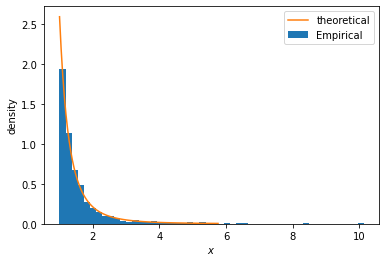

In [23]:
# Гистограмма нормированных значений
plt.hist(sample, density=True, bins=50, label='Empirical')
# Теоретическая плотность распределения
xs = np.linspace(pareto_db.ppf(0.01), pareto_db.ppf(0.99), 100)
plt.plot(xs, pareto_db.pdf(xs), label='theoretical')
plt.ylabel('density')
plt.xlabel('$x$')
plt.legend(loc='upper right')

# Центральная предельная теорема

Посчитаем данные нормального распределения, к которому стремится саспределение выборочных средних. Для этого нам нужна дисперсия и математическое ожидание.

In [24]:
# Считаем дисперсию и среднеквадратичное отклонение
DX = pareto_db.var()
sigma = sci.sqrt(DX)
# Считаем мат. ожидание как первый момент
EX = pareto_db.moment(1)
print(f'Дисперсия равна {round(DX, 2)} а матожидание {round(EX, 2)}')

Дисперсия равна 1.57 а матожидание 1.61


In [25]:
def experiment(n: int, distr: sts.rv_continuous, EX: float, DX: float, bins: int = 50):
    """
    Функция описывает эксперимент для заданного n. В результате эксперимента строится 1000 
    выборок размера n заданного распределения. Также будут нарисованы нормированные 
    гистограммы полученных выборочных средних и теоретическая функциия плотности нормального 
    распределения, которым описываются полученные выборочные средние.

    :param n: Размер выборки
    :param dist: Класс заданного распределения
    :param EX: Математическое ожидание
    :param DX: Дисперсия
    :param bins: Число карманов гистограммы (по-умолчанию 50)
    """
    # Выборка размера 1000 из выборочных средних выборок размера n
    avrs = [np.mean(pareto_db.rvs(size=n)) for _ in range(1000)]
    # Теперь зададим параметры искомого распределения, не забываем про то, что второй 
    # параметр - это среднеквадратичное отклонение, а не дисперсия
    norm_db = sts.norm(loc=EX, scale=sci.sqrt(DX / n))

    # Рисуем гистограмму
    plt.hist(avrs, density=True, bins=bins, label='Empirical')
    # Теоретическая плотность распределения
    xs = np.linspace(norm_db.ppf(0.01), norm_db.ppf(0.99), 100)
    plt.plot(xs, norm_db.pdf(xs), label='theoretical')
    plt.ylabel('density')
    plt.xlabel('$x$')
    plt.legend(loc='upper right')



Эксперимент при ```n = 5```

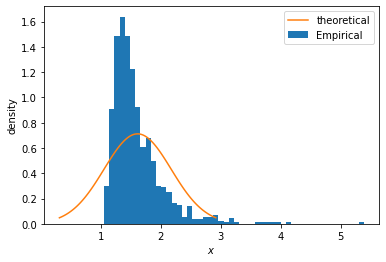

In [26]:
experiment(n=5, distr=pareto_db, EX=EX, DX=DX)

Эксперимент при ```n = 10```

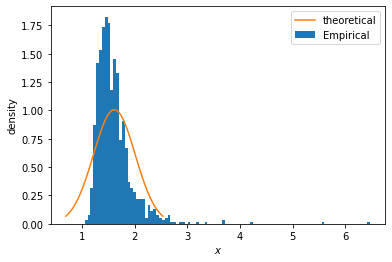

In [27]:
experiment(n=10, distr=pareto_db, EX=EX, DX=DX, bins=100)

Эксперимент при ```n = 50```

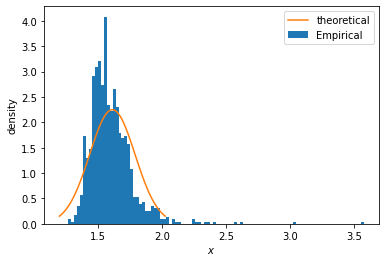

In [28]:
experiment(n=50, distr=pareto_db, EX=EX, DX=DX, bins=100)

В качестве вывода можно отметить два наблюдения:
* Действительно согласно ЦПТ распределение выборочных средних стремится к нормальному с заданными параметрами. 
* У нас "скошенное" распределение и, как было сказано в видеоуроках, нужна очень большая выборока и повтор большого числа экспериментов, чтобы у нас гистограмма действительно стала похоже на наше распределение.  